In [2]:
import pandas as pd

import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import hdbscan

import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

LOAD DATA

In [29]:
script_dir = os.path.dirname("1.0 PCA+Kmeans_DBSCAN_HDBSCAN.ipynb")
data_path = os.path.join(script_dir,'..','..','Data', 'RawData.csv')
data = pd.read_csv(data_path,encoding='latin1').dropna()
data=pd.DataFrame(data)
data.head()

,Unnamed: 0,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,...,XMV3,XMV4,XMV5,XMV6,XMV7,XMV8,XMV9,XMV10,XMV11,XMV12
0,1,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,...,26.662173,60.482854,0,24.229301,37.208198,46.430526,0,35.865322,12.930642,100
1,2,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,...,26.689544,60.524644,0,24.171763,37.227431,46.427192,0,35.719177,11.714423,100
2,3,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,...,26.705507,60.546193,0,25.179022,37.243766,46.442544,0,35.740715,10.734676,100
3,4,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,...,26.768653,60.568588,0,26.922729,37.211698,46.407497,0,35.736154,10.311783,100
4,5,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,...,26.396773,60.637598,0,29.039605,37.199517,46.424034,0,35.890716,11.181380,100


In [17]:
 #2. Check for missing values in the dataset. Ans? There is not.
data.isnull().sum().sum()

0

In [18]:
 #3. Check for zeros values in the dataset. Yes They are. Questions? Two models ine with zeros and another with 

data.eq(0).any()

Unnamed: 0    False
XMEAS1         True
XMEAS2        False
XMEAS3        False
XMEAS4        False
XMEAS5        False
XMEAS6        False
XMEAS7        False
XMEAS8        False
XMEAS9        False
XMEAS10       False
XMEAS11       False
XMEAS12       False
XMEAS13       False
XMEAS14       False
XMEAS15       False
XMEAS16       False
XMEAS17       False
XMEAS18       False
XMEAS19        True
XMEAS20       False
XMEAS21       False
XMEAS22       False
XMEAS23       False
XMEAS24       False
XMEAS25       False
XMEAS26       False
XMEAS27       False
XMEAS28       False
XMEAS29       False
XMEAS30       False
XMEAS31       False
XMEAS32       False
XMEAS33       False
XMEAS34       False
XMEAS35       False
XMEAS36       False
XMEAS37       False
XMEAS38       False
XMEAS39       False
XMEAS40       False
XMEAS41       False
XMV1          False
XMV2          False
XMV3           True
XMV4          False
XMV5           True
XMV6          False
XMV7          False
XMV8          False


In [19]:
 #4. Split the data
train_data, test_data= train_test_split(data,train_size=0.7, test_size=0.3, random_state=60)
validation_data, test_data = train_test_split(test_data,train_size=0.50, test_size=0.50, random_state=60)

print(f'Length of framework is: {len(data)}\n',
      f'Length of training data is: {len(train_data)}\n',
      f'Length of test data is: {len(test_data)}\n',
      f'Length of validation data is: {len(validation_data)}\n')

Length of framework is: 1995
 Length of training data is: 1396
 Length of test data is: 300
 Length of validation data is: 299



In [20]:
Norm =MinMaxScaler()
train_data_normalized=pd.DataFrame(Norm.fit_transform(train_data))
train_data_normalized

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.934270,0.619302,0.547377,0.348319,0.339101,0.814428,0.816266,0.343137,0.206879,0.198479,...,0.472771,0.331744,0.0,0.001612,0.498881,0.711676,0.0,0.936341,0.405136,0.0
1,0.980933,0.003323,0.373715,0.349525,0.279702,0.375540,0.384848,0.553326,0.681733,0.491970,...,1.000000,0.313770,0.0,0.385568,0.441468,0.573721,0.0,0.480033,0.485658,0.0
2,0.446563,0.354688,0.325023,0.201013,0.449117,0.779842,0.718445,0.534793,0.610284,0.602473,...,0.270199,0.462316,0.0,0.257289,0.292323,0.615305,0.0,0.807797,0.277610,0.0
3,0.512795,0.426927,0.368621,0.337967,0.532981,0.639324,0.680352,0.447239,0.484486,0.516680,...,0.323160,0.440352,0.0,1.000000,0.030935,0.110520,0.0,0.707151,0.329957,0.0
4,0.667336,0.389784,0.337256,0.279257,0.456573,0.878028,0.875103,0.517191,0.544406,0.555145,...,0.295521,0.493062,0.0,0.010899,0.334545,0.392553,0.0,0.900263,0.251174,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1391,0.200201,0.390040,0.403831,0.263944,0.637670,0.776460,0.817326,0.538410,0.478747,0.667525,...,0.295920,0.585622,0.0,0.490156,0.211529,0.501767,0.0,0.841120,0.169090,0.0
1392,0.711490,0.217041,0.248820,0.119219,0.562458,0.721585,0.698272,0.377439,0.566617,0.489309,...,0.164701,0.539297,0.0,0.001846,0.373138,0.962278,0.0,0.827046,0.127693,0.0
1393,0.805820,0.283438,0.288028,0.197856,0.548002,0.748529,0.704658,0.565687,0.488133,0.526167,...,0.213960,0.471381,0.0,0.349864,0.295159,0.528898,0.0,0.756639,0.306375,0.0
1394,0.546412,0.155347,0.169504,0.179721,0.554217,0.794922,0.748676,0.458218,0.572733,0.257930,...,0.116446,0.570925,0.0,0.005664,0.299397,0.871253,0.0,0.757869,0.276053,0.0


In [21]:
DPCA = PCA(n_components=10)
df_pca = pd.DataFrame(DPCA.fit_transform(train_data_normalized))
df_pca

,0,1,2,3,4,5,6,7,8,9
0,-0.416180,-0.009426,0.769648,0.062643,0.380082,0.219714,-0.325743,0.017928,0.531237,0.176132
1,-0.116567,1.539097,-0.150306,-0.478778,-0.046768,-0.074046,-0.132334,0.274983,-0.173371,0.049063
2,-0.225105,0.009468,-0.040687,-0.025414,-0.199682,0.416004,0.174437,-0.103688,0.041049,-0.068300
3,0.739056,0.331817,-0.530488,0.924283,-0.135607,-0.050920,-0.109253,-0.289552,-0.065870,0.092075
4,-0.326798,-0.065341,0.309852,0.142682,-0.006213,0.068844,0.311908,0.155206,0.165002,-0.337907
...,...,...,...,...,...,...,...,...,...,...
1391,0.825858,-0.413337,0.101852,-0.036462,0.058313,0.104406,-0.082883,0.133822,-0.022748,0.055860
1392,-0.887056,-0.212663,0.067038,-0.429999,0.049727,-0.096575,-0.218377,0.087725,-0.236076,-0.038873
1393,-0.307469,0.241940,-0.267686,0.144915,-0.001735,-0.022239,-0.001472,0.106710,-0.039323,-0.026576
1394,-0.627303,-0.195558,-0.043354,-0.361506,-0.015097,0.324380,0.039091,0.063848,-0.335777,0.051147


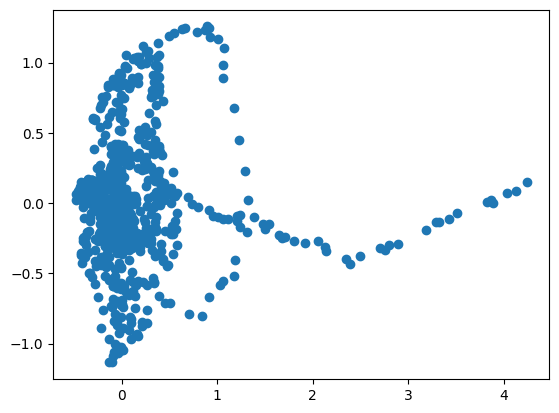

In [22]:
#Projecting the PCA result
plt.scatter(df_pca[1], df_pca[2])

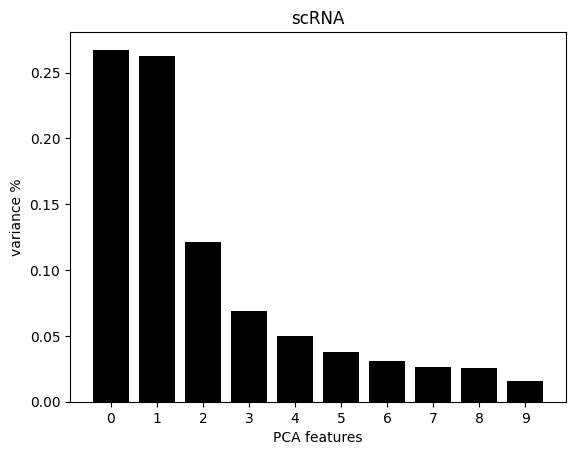

In [23]:
features = range(DPCA.n_components_)
plt.bar(features, DPCA.explained_variance_ratio_, color='black')
plt.title("scRNA")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

In [24]:
scaler = StandardScaler().fit(train_data)
train_data_Standard = scaler.transform(train_data)
#train_data_Standard

In [25]:
DPCA = PCA(n_components=10)
data_pca= DPCA.fit_transform(train_data_Standard)
#type(data_pca)

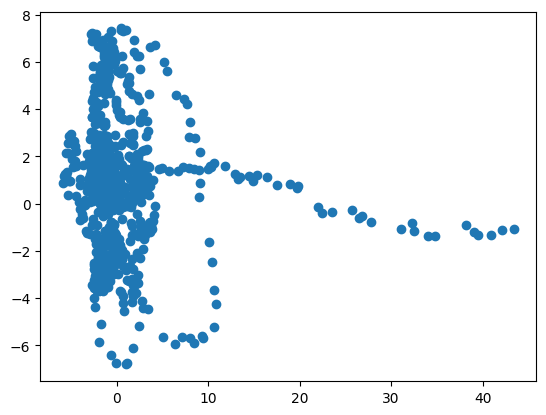

In [26]:
#Projecting the PCA result
plt.scatter(data_pca[:,0], data_pca[:,1])

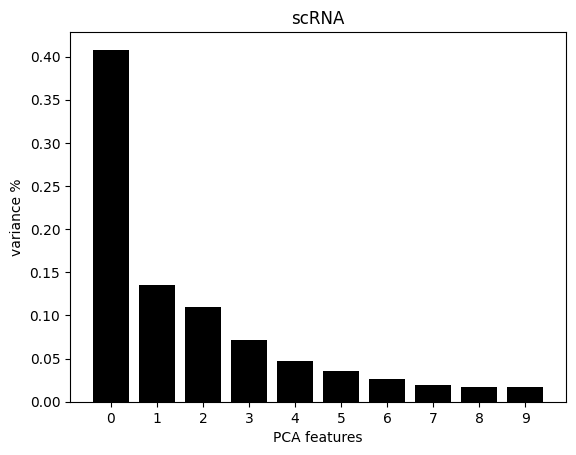

In [27]:
features = range(DPCA.n_components_)
plt.bar(features, DPCA.explained_variance_ratio_, color='black')
plt.title("scRNA")
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

K-Means

In [28]:
# Clustering
os.environ['OMP_NUM_THREADS'] = '6'
# Instantiate KMeans object
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init='auto', random_state=0)
# Fit and predict clusters
y_kmeans = kmeans.fit_predict(data_pca)
y_kmeans
len(y_kmeans)


c:\Users\luiss\anaconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


1396

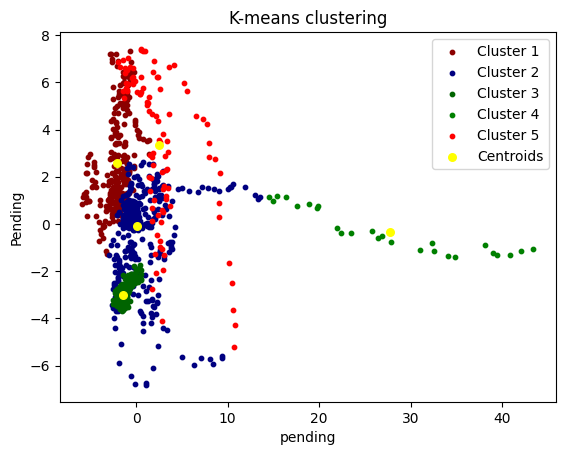

In [29]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 10, c = 'darkred', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 10, c = 'navy', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 10, c = 'darkgreen', label = 'Cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 10, c = 'green', label = 'Cluster 4')
plt.scatter(data_pca[y_kmeans == 4, 0], data_pca[y_kmeans == 4, 1], s = 10, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('K-means clustering')
plt.xlabel('pending')
plt.ylabel('Pending')
plt.legend()
plt.show()

In [30]:
db_index = davies_bouldin_score(data_pca,y_kmeans)
db_index

1.3470610378836914

In [31]:
score = silhouette_score(data_pca,y_kmeans,metric='euclidean')
print(score)

0.2853105791064962


DBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


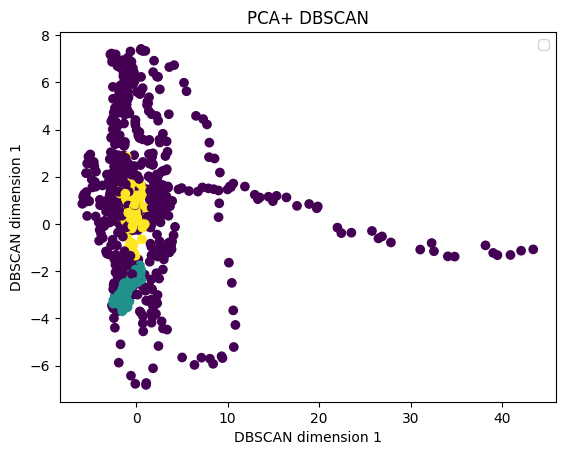

In [33]:
# Clustering
dbscan = DBSCAN(eps=2, min_samples=28)# Best combination achieved. It's fun to play with them
clusters = dbscan.fit_predict(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA+ DBSCAN')
plt.xlabel("DBSCAN dimension 1")
plt.ylabel("DBSCAN dimension 1")
plt.legend()
plt.show()

In [ ]:
db_index = davies_bouldin_score(data_pca,clusters)
db_index

3.2489973241741996

In [ ]:
score = silhouette_score(data_pca,clusters,metric='euclidean')
print(score)

0.15808367377117405


HDBSCAN

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


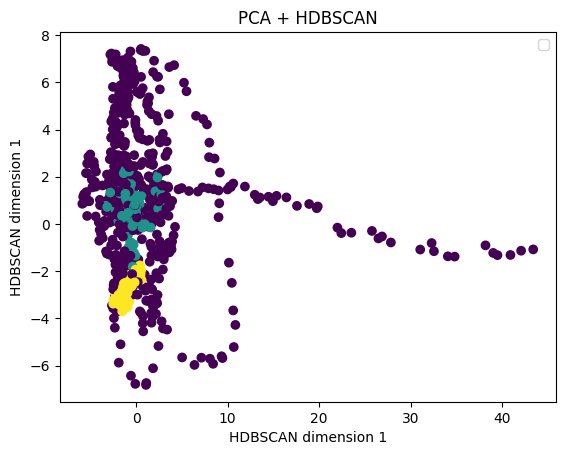

In [ ]:
# Clustering
HD = hdbscan.HDBSCAN(min_cluster_size=100, min_samples=5)
cluster_labels = HD.fit_predict(data_pca)

plt.scatter(data_pca[:, 0], data_pca[:, 1],c=cluster_labels, cmap='viridis')
plt.title('PCA + HDBSCAN')
plt.xlabel("HDBSCAN dimension 1")
plt.ylabel("HDBSCAN dimension 1")
plt.legend()
plt.show()

In [ ]:
db_index = davies_bouldin_score(data_pca,cluster_labels)
db_index

3.264235362422836

In [ ]:
score = silhouette_score(data_pca,cluster_labels,metric='euclidean')
print(score)

0.15152618273071847
